In [1]:
%matplotlib inline

import cv2
import pandas as pd

from src.displaytools import *
from src.ftextraction import *
from src.improcessing import *
from src.maskcreation import *
from src.maskanalysis import *

# Read In Image File

In [2]:
image_stack = cv2.imreadmulti('source_images/Adherent.tif', flags=cv2.IMREAD_GRAYSCALE)[1]

# Set Up Masks To Test

In [3]:
params = [
    # 'src/params/median_filter.yml', 
    # 'src/params/median_filter_2.yml', 
    # 'src/params/median_filter_3.yml', 
    # 'src/params/foreground_mask_mean.yml',
    # 'src/params/foreground_mask_isodata.yml', 
    # 'src/params/foreground_mask_li.yml', 
    # 'src/params/foreground_mask_minimum.yml', 
    # 'src/params/foreground_mask_otsu.yml', 
    # 'src/params/foreground_mask_triangle.yml', 
    # 'src/params/histogram_normalize.yml', 
    # 'src/params_gray_mask.yml',
    'src/params/hpf_manual.yml'
          ]

# Find Best Mask
Run through each of the defined parameters and compare the results

Searching through range range(-25, 1).
Using mode 'thresh_manual'.
Denoising with intensity 5.
Enhancing contrast by factor of 100.00, with offset=-25 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking regions smaller than 60 pixels.
Unmasking areas without edges using Canny[130, 180]:
Using mode 'thresh_manual'.
Denoising with intensity 5.
Enhancing contrast by factor of 100.00, with offset=-25 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 5.
Unmasking areas without edges using Canny[130, 180]:
Using mode 'thresh_manual'.
Denoising with intensity 5.
Enhancing contrast by factor of 100.00, with offset=-24 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking regions smaller than 60 pixels.
Unmasking areas without edges using Canny[130, 180]

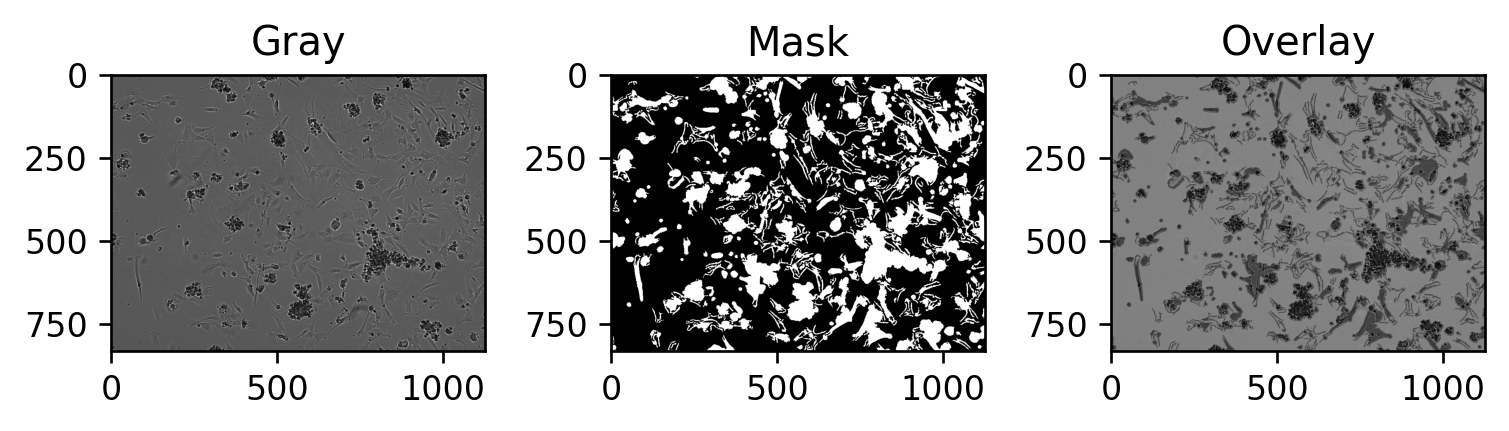

In [4]:
image_gray = scale_image(image_stack[-1]) # focus on last image
errors = {'Params': [], 'SSIM': [], 'MSE': [], 'Cell Count': []}
for param in params:
    mask_image, search_range = get_mask_image_with_refined_offset(image_gray, param, verbosity=1)
    # df, mask_labels = extract_features(image_gray, mask_image)

    ssim, mse = test_mask(image_gray, mask_image, mask=param, verbosity=2)

    # get param name
    param_name = param.split('/')[-1]
    param_name = param_name[:-4] # remove ".yml"

    errors['Params'].append(param_name)
    errors['SSIM'].append(ssim)
    errors['MSE'].append(mse)
    # errors['Cell Count'].append(len(df))


In [5]:
df = pd.DataFrame.from_dict(errors)
df.sort_values('SSIM')

ValueError: All arrays must be of the same length

In [ ]:
df.sort_values('MSE')

In [ ]:
df.sort_values('Cell Count')